In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head()

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99


In [4]:
df_q10 = df.filter(regex='Q10')
df_q10.head()

,Q10_RE_Documentation_NotDocumented,Q10_RE_Documentation_VisionDocument,Q10_RE_Documentation_RequirementsLists,Q10_RE_Documentation_GoalModels,Q10_RE_Documentation_UseCaseModels,Q10_RE_Documentation_Prototypes,Q10_RE_Documentation_UserStories,Q10_RE_Documentation_BDDScenarios,Q10_RE_Documentation_MLCanvas,Q10_RE_Documentation_Notebooks,Q10_RE_Documentation_DataModels,Q10_RE_Documentation_Others,Q10_RE_Documentation_Others_Free
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
4,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
5,not quoted,quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
6,not quoted,not quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99


In [5]:
#Responses as others

df_q10_others = df_q10.filter(regex='Others')
df_q10_others

for c in df_q10_others.columns:
    print(c)
    print(df_q10_others[c].value_counts())

Q10_RE_Documentation_Others
not quoted    179
-77            82
quoted         15
Name: Q10_RE_Documentation_Others, dtype: int64
Q10_RE_Documentation_Others_Free                  
-99                                                                                       179
-66                                                                                        82
Notion/ Git hub                                                                             1
Jira                                                                                        1
Reporting via Jira & Confluence                                                             1
limited docmentataion                                                                       1
wiki                                                                                        1
Meeting Notes, mostly                                                                       1
Google Docs shared between stakeholders                            

In [6]:
# Pandas DataFrame [quoted per columns]

dict_q10 = {}
for c in df_q10.columns:
    if "Free" and "Others" not in c:
        role = c.split('_')
        dict_q10[role[3:][0]] = df_q10[c].value_counts()['quoted']

df_q10_quoted = pd.DataFrame(data={'Documentation': list(dict_q10.keys()), 'Answers': list(dict_q10.values())})
df_q10_quoted = df_q10_quoted.sort_values('Answers', ascending=False)
df_q10_quoted

,Documentation,Answers
9,Notebooks,66
6,UserStories,63
2,RequirementsLists,51
5,Prototypes,42
4,UseCaseModels,38
10,DataModels,34
0,NotDocumented,30
1,VisionDocument,29
3,GoalModels,29
8,MLCanvas,15


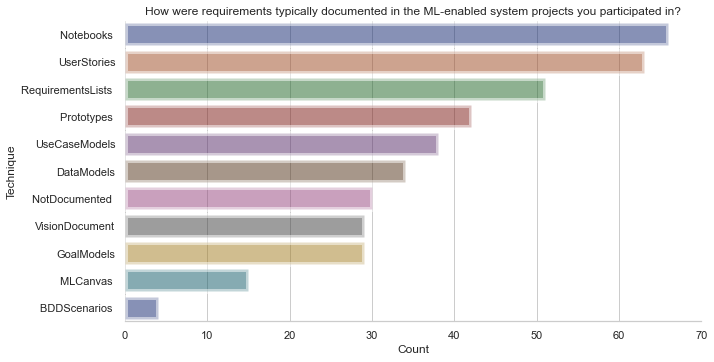

In [7]:
single_barplot(df_q10_quoted, "Answers", "Documentation",
               title="How were requirements typically documented in the ML-enabled system projects you participated in?",
               x_label="Count", y_label="Technique", x_label_rotation=0)

In [8]:
for other in list(df['Q10_RE_Documentation_Others_Free                  '].unique()):
    print(other)

-99
Notion/ Git hub
nan
Jira
Reporting via Jira & Confluence
limited docmentataion
wiki
Meeting Notes, mostly
Google Docs shared between stakeholders
Formal Documentation in Confluence for Models Validation and Audit (Internal/External)
Design documents
Confluence docs
Confluence pages
Design docs
Creating a  document in Confluence.
Mathematical Models
-66
